In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cricket = pd.read_csv('Cricket.csv',encoding="ISO-8859-1")

In [4]:
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [5]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
cricket.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [7]:
cricket.shape

(79, 13)

In [8]:
# checkng null values
cricket.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

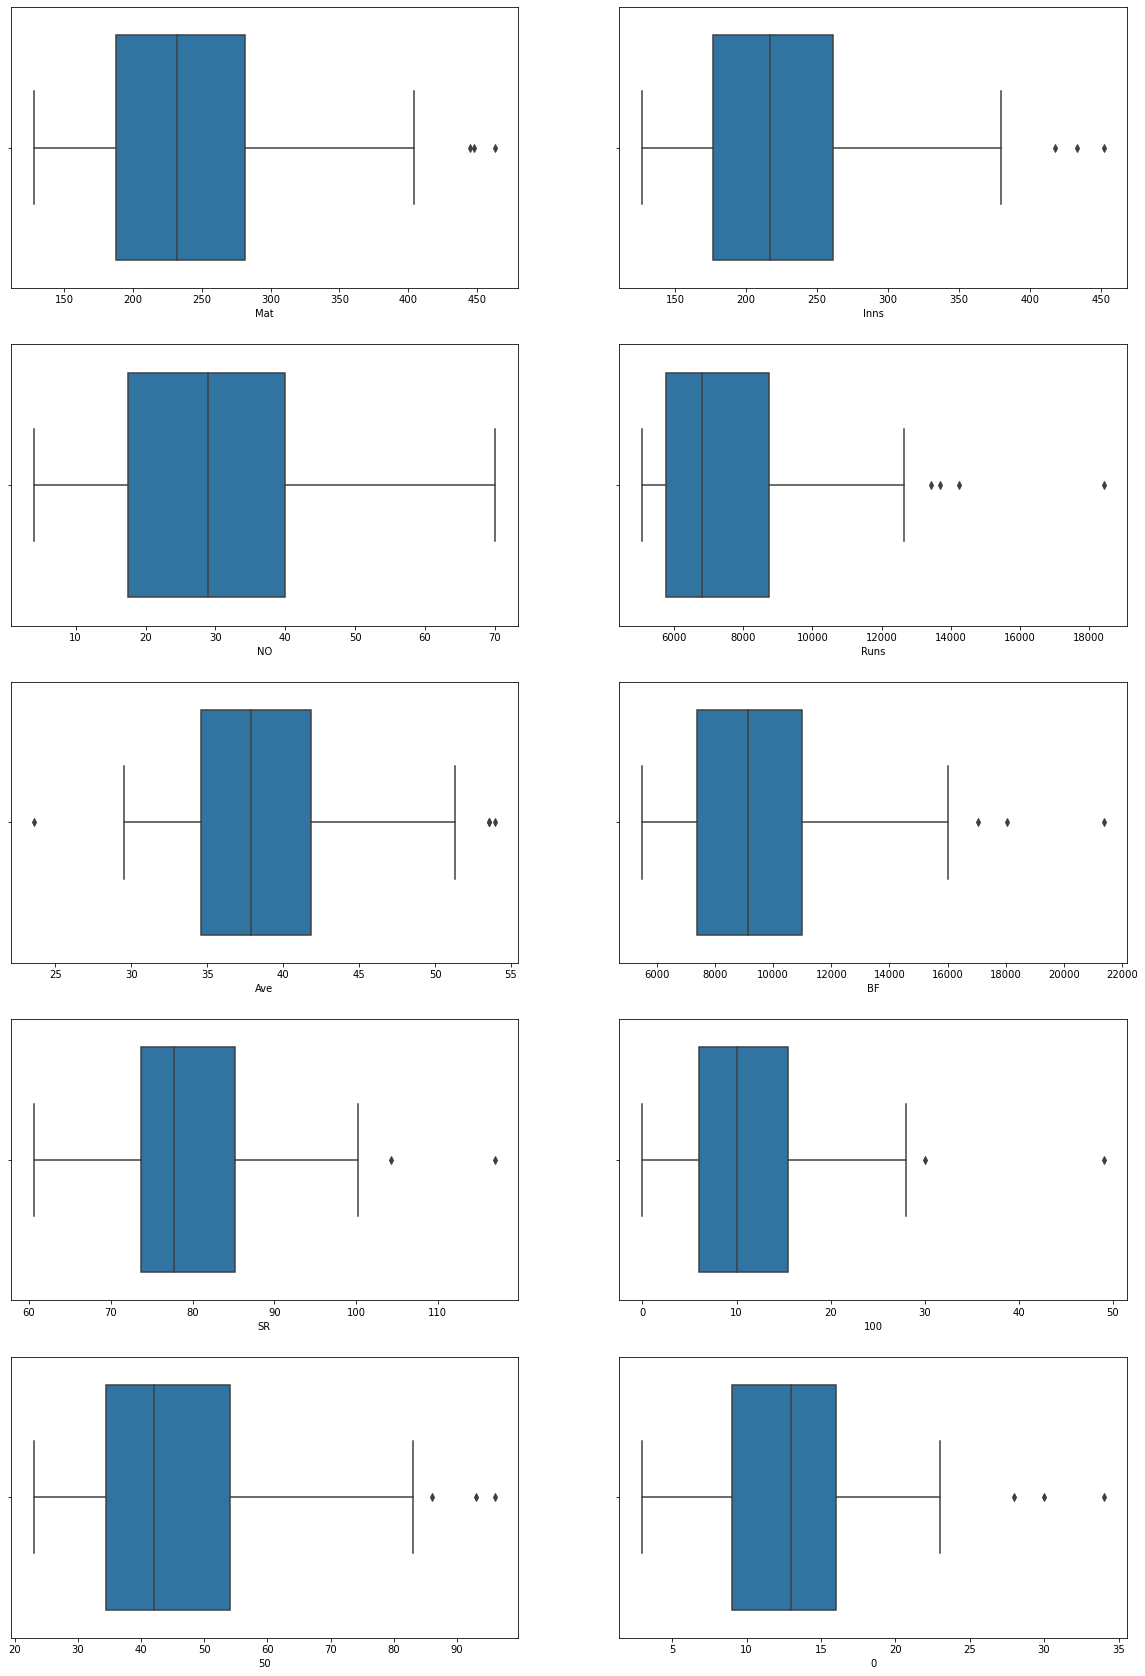

In [9]:
# checking for outliers
col = ['Mat', 'Inns', 'NO', 'Runs', 'Ave', 'BF', 'SR',
       '100', '50', '0']

plt.figure(figsize=(20,30))
for i,v in enumerate(col):
    plt.subplot(5,2,i+1)
    sns.boxplot(cricket[v])
    
plt.show()

In [10]:
# not required

df=cricket.copy()
df['years'] = pd.to_numeric(df.Span.apply(lambda x:x.split('-')[1]))-pd.to_numeric(df.Span.apply(lambda x:x.split('-')[0]))
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,years
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


<AxesSubplot:xlabel='years'>

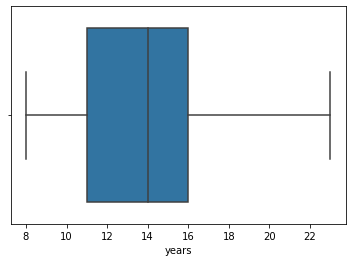

In [11]:
sns.boxplot(df.years)

### Standardisation

In [12]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [13]:
df = cricket[['Player','SR','Ave']]
df.head()

,Player,SR,Ave
0,SR Tendulkar (INDIA),86.23,44.83
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98
2,RT Ponting (AUS/ICC),80.39,42.03
3,ST Jayasuriya (Asia/SL),91.20,32.36
4,DPMD Jayawardene (Asia/SL),78.96,33.37


In [14]:
df_scaled = cricket[["SR",'Ave']]
df_scaled.head()

,SR,Ave
0,86.23,44.83
1,78.86,41.98
2,80.39,42.03
3,91.20,32.36
4,78.96,33.37


In [15]:
# fit_transform
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

In [16]:
# converting array to df
df_scaled = pd.DataFrame(df_scaled, columns=['SR','Ave'])
df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


## K-Means Clustering

In [17]:
import sklearn
from sklearn.cluster import KMeans

In [18]:
# fitting the model
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=100)

In [19]:
kmeans.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2])

In [20]:
# assign the labels
df['cluster_id'] = kmeans.labels_
df.head()

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,3
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,1
2,RT Ponting (AUS/ICC),80.39,42.03,1
3,ST Jayasuriya (Asia/SL),91.20,32.36,0
4,DPMD Jayawardene (Asia/SL),78.96,33.37,2


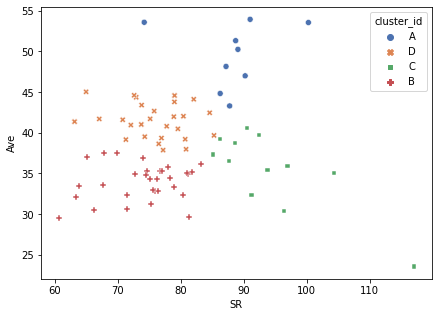

In [67]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='SR', y='Ave', data=df, hue='cluster_id', palette='deep', style='cluster_id')


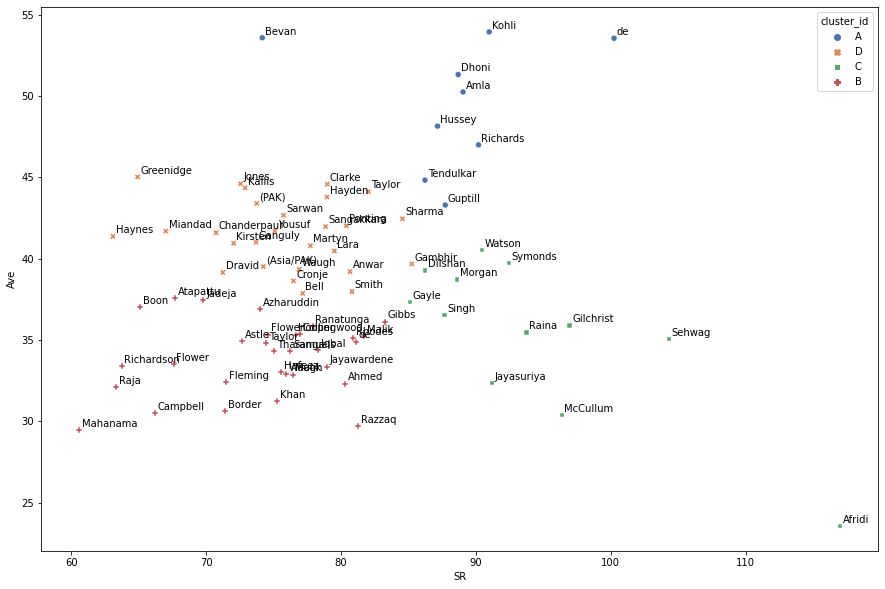

In [70]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='SR', y='Ave', data=df, hue='cluster_id', palette='deep', style='cluster_id')

# show labels
for i, v in enumerate(df.Player):
    label = v.split()[1]
    plt.annotate(label, (df.SR[i]+0.2,df.Ave[i]+0.2))

plt.show()

#### <font color=red> Who falls in the same cluster as Virat Kohli?

In [22]:
df[df.Player==df.Player.apply(lambda x: x if 'Kohli' in x else False)]

,Player,SR,Ave,cluster_id
25,V Kohli (INDIA),90.99,53.94,3


In [23]:
df[df.cluster_id==3]

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,3
13,MS Dhoni (Asia/INDIA),88.69,51.32,3
15,AB de Villiers (Afr/SA),100.25,53.55,3
25,V Kohli (INDIA),90.99,53.94,3
34,HM Amla (SA),89.05,50.25,3
38,MG Bevan (AUS),74.16,53.58,3
42,IVA Richards (WI),90.20,47.00,3
63,MJ Guptill (NZ),87.73,43.30,3
64,MEK Hussey (AUS),87.16,48.15,3


#### <font color=red> Based on the clustering, choose the correct statement given that the clusters formed are (high SR, high Ave) - A, (low SR, low Ave) - B, (High SR, Low Ave) - C, (Low SR, High Ave) - D
- <font color=red>IVA RIchards and SR Tendulkar both belong to group A
- <font color=red>R Dravid is in group C
- <font color=red>Chris Gayle belongs to group B
- <font color=red>MJ Guptill belongs to group D

In [24]:
# changing cluster labels
df.cluster_id = df.cluster_id.apply(lambda x: 'A' if x==3 else('B' if x==2 else('C' if x==0 else 'D')))
df.head()

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,A
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,D
2,RT Ponting (AUS/ICC),80.39,42.03,D
3,ST Jayasuriya (Asia/SL),91.20,32.36,C
4,DPMD Jayawardene (Asia/SL),78.96,33.37,B


In [32]:
for name in ['Tendulkar', 'IVA Richards', 'Dravid', 'Gayle', 'Guptill']:
    print(df[df.Player==df.Player.apply(lambda x: x if name in x else False)])

                 Player     SR    Ave cluster_id
0  SR Tendulkar (INDIA)  86.23  44.83          A
               Player    SR   Ave cluster_id
42  IVA Richards (WI)  90.2  47.0          A
                      Player     SR    Ave cluster_id
8  R Dravid (Asia/ICC/INDIA)  71.24  39.16          D
               Player     SR    Ave cluster_id
17  CH Gayle (ICC/WI)  85.11  37.33          C
             Player     SR   Ave cluster_id
63  MJ Guptill (NZ)  87.73  43.3          A


## Heirarchial

In [33]:
# import libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

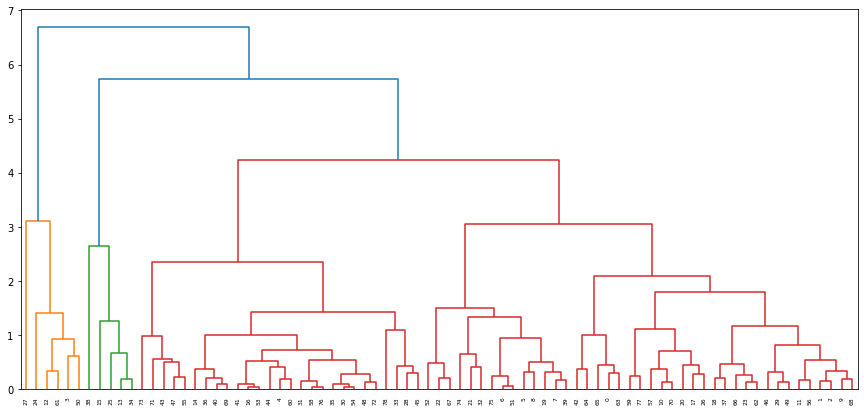

In [39]:
# complete linkage dendrogram
mergings = linkage(df_scaled, method='complete', metric='euclidean')

plt.figure(figsize=(15,7))
dendrogram(mergings)
plt.show()

In [41]:
# cluster_labels (k=4)
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1,)
df['cluster_labels'] = cluster_labels
df.head()

,Player,SR,Ave,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),86.23,44.83,A,0
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,D,0
2,RT Ponting (AUS/ICC),80.39,42.03,D,0
3,ST Jayasuriya (Asia/SL),91.20,32.36,C,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,B,2


In [42]:
# changing cluster labels
df.cluster_labels = df.cluster_labels.apply(lambda x: 'A' if x==3 else('B' if x==2 else('C' if x==0 else 'D')))
df.head()

,Player,SR,Ave,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),86.23,44.83,A,C
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,D,C
2,RT Ponting (AUS/ICC),80.39,42.03,D,C
3,ST Jayasuriya (Asia/SL),91.20,32.36,C,D
4,DPMD Jayawardene (Asia/SL),78.96,33.37,B,B


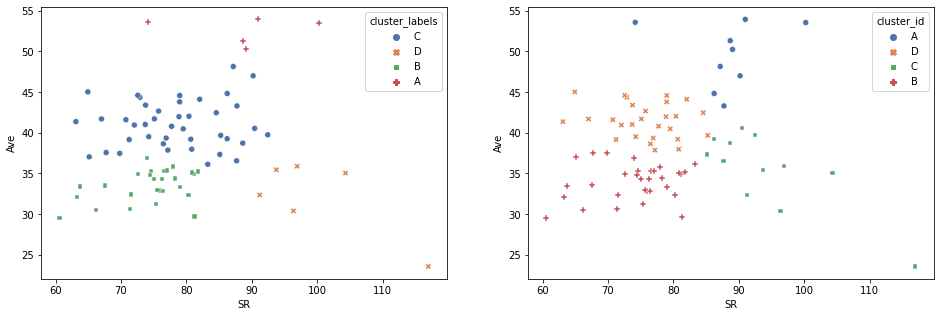

In [75]:
# checking difference in K-Means and Hierarchial

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.scatterplot(x='SR', y='Ave', data=df, hue='cluster_labels', palette='deep', style='cluster_labels')

plt.subplot(1,2,2)
sns.scatterplot(x='SR', y='Ave', data=df, hue='cluster_id', palette='deep', style='cluster_id')

plt.show()

#### <font color=red>Make the dendrogram using the complete linkage.Cut the tree at k = 4. Which of the following is correct statement
- <font color=red>Virat Kohli and Sachin Tendulkar are in the same cluster
- <font color=red>CH Gayle and V Sehwag are in the same cluster
- <font color=red>SC Ganguly, R Dravid and SR Tendulkar are in the same cluster
- <font color=red>RG Sharma is in the cluster with the highest average strike rate

In [47]:
for name in ['Tendulkar', 'Kohli', 'Dravid', 'Sehwag', 'Gayle', 'Ganguly', 'Sharma']:
    print(df[df.Player==df.Player.apply(lambda x: x if name in x else False)])

                 Player     SR    Ave cluster_id cluster_labels
0  SR Tendulkar (INDIA)  86.23  44.83          A              C
             Player     SR    Ave cluster_id cluster_labels
25  V Kohli (INDIA)  90.99  53.94          A              A
                      Player     SR    Ave cluster_id cluster_labels
8  R Dravid (Asia/ICC/INDIA)  71.24  39.16          D              C
                       Player      SR    Ave cluster_id cluster_labels
24  V Sehwag (Asia/ICC/INDIA)  104.33  35.05          C              D
               Player     SR    Ave cluster_id cluster_labels
17  CH Gayle (ICC/WI)  85.11  37.33          C              C
                    Player    SR    Ave cluster_id cluster_labels
7  SC Ganguly (Asia/INDIA)  73.7  41.02          D              C
               Player     SR    Ave cluster_id cluster_labels
65  RG Sharma (INDIA)  84.56  42.46          D              C
